In [1]:
# Imports
import pandas as pd
import numpy as np
from pathlib import Path
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report

In [2]:
### Step 1: Import the CRYPTO dataset into a Pandas DataFrame.

In [3]:
# Import the Crypto dataset into a Pandas Dataframe

bitcoin_df = pd.read_csv(
    Path("Resources/augmento_eth.csv"),  
    index_col='date', 
    infer_datetime_format=True, 
    parse_dates=True
)

# Review the DataFrame
display(bitcoin_df.head())
display(bitcoin_df.tail())

C:\Users\chris\AppData\Local\Temp\ipykernel_28232\3153589892.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  bitcoin_df = pd.read_csv(


,listing_close,twitter_hacks,twitter_pessimistic_doubtful,twitter_banks,twitter_selling,twitter_market_manipulation,twitter_de_centralisation,twitter_angry,twitter_etf,twitter_leverage,...,reddit_buying,reddit_warning,reddit_annoyed_frustrated,reddit_price,reddit_use_case_applications,reddit_rumor,reddit_scam_fraud,reddit_airdrop,reddit_optimistic,reddit_negative
date,,,,,,,,,,,,,,,,,,,,,
2016-11-01 01:00:00,10.877,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-11-01 02:00:00,10.860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2016-11-01 03:00:00,10.744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-11-01 04:00:00,10.716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-11-01 05:00:00,10.761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


,listing_close,twitter_hacks,twitter_pessimistic_doubtful,twitter_banks,twitter_selling,twitter_market_manipulation,twitter_de_centralisation,twitter_angry,twitter_etf,twitter_leverage,...,reddit_buying,reddit_warning,reddit_annoyed_frustrated,reddit_price,reddit_use_case_applications,reddit_rumor,reddit_scam_fraud,reddit_airdrop,reddit_optimistic,reddit_negative
date,,,,,,,,,,,,,,,,,,,,,
2023-12-21 05:00:00,2198.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0,1.0,6.0
2023-12-21 06:00:00,2218.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,2.0,2.0,0.0,1.0,1.0,1.0,5.0
2023-12-21 07:00:00,2219.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,7.0
2023-12-21 08:00:00,2214.5,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,0.0,8.0,0.0,0.0,2.0,2.0,3.0,7.0
2023-12-21 09:00:00,2222.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


<Axes: xlabel='date'>

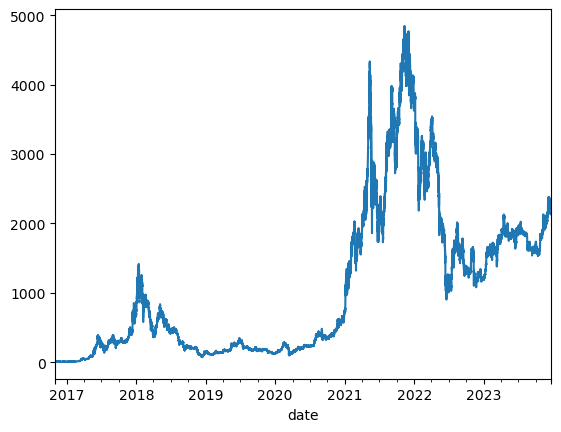

In [4]:
# Plot the actual returns versus the strategy returns
bitcoin_df["listing_close"].plot()

In [5]:
# Group data by daily
#grouped_bitcoin_df = bitcoin_df.groupby(pd.Grouper(key='date', freq='D'))
#grouped_bitcoin_df.head()

In [6]:
# Filter the date index and close columns
#signals_df = bitcoin_df.loc[:, ["listing_close]]
signals_df = bitcoin_df.copy()
signals_df.sort_index(ascending=False)

# Use the pct_change function to generate returns from close prices
signals_df["Actual_Returns"] = signals_df["listing_close"].pct_change()

# Drop all NaN values from the DataFrame
signals_df = signals_df.dropna()

# Review the DataFrame
display(signals_df.head())

C:\Users\chris\AppData\Local\Temp\ipykernel_28232\2503264102.py:7: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  signals_df["Actual_Returns"] = signals_df["listing_close"].pct_change()


,listing_close,twitter_hacks,twitter_pessimistic_doubtful,twitter_banks,twitter_selling,twitter_market_manipulation,twitter_de_centralisation,twitter_angry,twitter_etf,twitter_leverage,...,reddit_warning,reddit_annoyed_frustrated,reddit_price,reddit_use_case_applications,reddit_rumor,reddit_scam_fraud,reddit_airdrop,reddit_optimistic,reddit_negative,Actual_Returns
date,,,,,,,,,,,,,,,,,,,,,
2016-11-01 02:00:00,10.860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.001563
2016-11-01 03:00:00,10.744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.010681
2016-11-01 04:00:00,10.716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.002606
2016-11-01 05:00:00,10.761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.004199
2016-11-01 06:00:00,10.775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.001301


In [7]:
### Step 2: Generate trading signals using short- and long-window SMA values. 

In [8]:
# Set the short window and long window
short_window = 1
long_window = 10

# Generate the fast and slow simple moving averages (1 and 10 days, respectively)
signals_df['SMA_Fast'] = signals_df['listing_close'].rolling(window=short_window).mean()
signals_df['SMA_Slow'] = signals_df['listing_close'].rolling(window=long_window).mean()

signals_df = signals_df.dropna()

# Review the DataFrame
display(signals_df.head())

,listing_close,twitter_hacks,twitter_pessimistic_doubtful,twitter_banks,twitter_selling,twitter_market_manipulation,twitter_de_centralisation,twitter_angry,twitter_etf,twitter_leverage,...,reddit_price,reddit_use_case_applications,reddit_rumor,reddit_scam_fraud,reddit_airdrop,reddit_optimistic,reddit_negative,Actual_Returns,SMA_Fast,SMA_Slow
date,,,,,,,,,,,,,,,,,,,,,
2016-11-01 11:00:00,10.511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,2.0,0.0,1.0,0.0,1.0,5.0,0.000381,10.511,10.6818
2016-11-01 12:00:00,10.636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.011892,10.636,10.6594
2016-11-01 13:00:00,10.803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,0.0,1.0,0.0,1.0,6.0,0.015701,10.803,10.6653
2016-11-01 14:00:00,10.921,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,5.0,1.0,0.0,0.0,0.0,2.0,4.0,0.010923,10.921,10.6858
2016-11-01 15:00:00,10.898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,0.0,0.0,0.0,2.0,4.0,-0.002106,10.898,10.6995


In [9]:
# Initialize the new Signal column
signals_df['Signal'] = 0.0

# When Actual Returns are greater than or equal to 0, generate signal to buy stock long
signals_df.loc[(signals_df['Actual_Returns'] >= 0), 'Signal'] = 1

# When Actual Returns are less than 0, generate signal to sell stock short
signals_df.loc[(signals_df['Actual_Returns'] < 0), 'Signal'] = -1

# Review the DataFrame
display(signals_df.head())

,listing_close,twitter_hacks,twitter_pessimistic_doubtful,twitter_banks,twitter_selling,twitter_market_manipulation,twitter_de_centralisation,twitter_angry,twitter_etf,twitter_leverage,...,reddit_use_case_applications,reddit_rumor,reddit_scam_fraud,reddit_airdrop,reddit_optimistic,reddit_negative,Actual_Returns,SMA_Fast,SMA_Slow,Signal
date,,,,,,,,,,,,,,,,,,,,,
2016-11-01 11:00:00,10.511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,1.0,0.0,1.0,5.0,0.000381,10.511,10.6818,1.0
2016-11-01 12:00:00,10.636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.011892,10.636,10.6594,1.0
2016-11-01 13:00:00,10.803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,6.0,0.015701,10.803,10.6653,1.0
2016-11-01 14:00:00,10.921,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,2.0,4.0,0.010923,10.921,10.6858,1.0
2016-11-01 15:00:00,10.898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,2.0,4.0,-0.002106,10.898,10.6995,-1.0


In [10]:
signals_df['Signal'].value_counts()

Signal
 1.0    31769
-1.0    30695
Name: count, dtype: int64

In [11]:
# Calculate the strategy returns and add them to the signals_df DataFrame
signals_df['Strategy_Returns'] = signals_df['Actual_Returns'] * signals_df['Signal'].shift()

# Review the DataFrame
display(signals_df.head())

,listing_close,twitter_hacks,twitter_pessimistic_doubtful,twitter_banks,twitter_selling,twitter_market_manipulation,twitter_de_centralisation,twitter_angry,twitter_etf,twitter_leverage,...,reddit_rumor,reddit_scam_fraud,reddit_airdrop,reddit_optimistic,reddit_negative,Actual_Returns,SMA_Fast,SMA_Slow,Signal,Strategy_Returns
date,,,,,,,,,,,,,,,,,,,,,
2016-11-01 11:00:00,10.511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,5.0,0.000381,10.511,10.6818,1.0,NaN
2016-11-01 12:00:00,10.636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.011892,10.636,10.6594,1.0,0.011892
2016-11-01 13:00:00,10.803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,6.0,0.015701,10.803,10.6653,1.0,0.015701
2016-11-01 14:00:00,10.921,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,4.0,0.010923,10.921,10.6858,1.0,0.010923
2016-11-01 15:00:00,10.898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,4.0,-0.002106,10.898,10.6995,-1.0,-0.002106


In [12]:
### Step 3: Split the data into training and testing datasets.

In [13]:
# Create new feature data frame called X
X = signals_df.drop(['listing_close','Signal','Actual_Returns','Strategy_Returns'], axis=1)
X.shift().dropna()

# Review the DataFrame
X.head()

,twitter_hacks,twitter_pessimistic_doubtful,twitter_banks,twitter_selling,twitter_market_manipulation,twitter_de_centralisation,twitter_angry,twitter_etf,twitter_leverage,twitter_bottom,...,reddit_annoyed_frustrated,reddit_price,reddit_use_case_applications,reddit_rumor,reddit_scam_fraud,reddit_airdrop,reddit_optimistic,reddit_negative,SMA_Fast,SMA_Slow
date,,,,,,,,,,,,,,,,,,,,,
2016-11-01 11:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,4.0,2.0,0.0,1.0,0.0,1.0,5.0,10.511,10.6818
2016-11-01 12:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,10.636,10.6594
2016-11-01 13:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,1.0,0.0,1.0,0.0,1.0,6.0,10.803,10.6653
2016-11-01 14:00:00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,5.0,1.0,0.0,0.0,0.0,2.0,4.0,10.921,10.6858
2016-11-01 15:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,1.0,0.0,0.0,0.0,2.0,4.0,10.898,10.6995


In [14]:
# Create the target set selecting the Signal column and assiging it to y
y = signals_df['Signal']

# Review the value counts
y.value_counts()

Signal
 1.0    31769
-1.0    30695
Name: count, dtype: int64

In [15]:
# Review y head
y.head()

date
2016-11-01 11:00:00    1.0
2016-11-01 12:00:00    1.0
2016-11-01 13:00:00    1.0
2016-11-01 14:00:00    1.0
2016-11-01 15:00:00   -1.0
Name: Signal, dtype: float64

In [16]:
# Select the start of the training period
training_begin = X.index.min()

# Display the training begin date
print(training_begin)

2016-11-01 11:00:00


In [17]:
# Select the ending period for the training data with an offset of 24 months
training_end = X.index.min() + DateOffset(months=72)

# Display the training end date
print(training_end)

2022-11-01 11:00:00


In [18]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Review the X_train DataFrame
X_train.head()
X_train.tail()
X_train.count()

twitter_hacks                   52508
twitter_pessimistic_doubtful    52508
twitter_banks                   52508
twitter_selling                 52508
twitter_market_manipulation     52508
                                ...  
reddit_airdrop                  52508
reddit_optimistic               52508
reddit_negative                 52508
SMA_Fast                        52508
SMA_Slow                        52508
Length: 281, dtype: int64

In [19]:
# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end+DateOffset(months=0):]
y_test = y.loc[training_end+DateOffset(months=0):]

# Review the X_test DataFrame
X_test.head()
X_test.tail()
X_test.count()

twitter_hacks                   9957
twitter_pessimistic_doubtful    9957
twitter_banks                   9957
twitter_selling                 9957
twitter_market_manipulation     9957
                                ... 
reddit_airdrop                  9957
reddit_optimistic               9957
reddit_negative                 9957
SMA_Fast                        9957
SMA_Slow                        9957
Length: 281, dtype: int64

In [20]:
### Step 4: Use the `SVC` classifier model from SKLearn's support vector machine (SVM) learning method to fit the training data and make predictions based on the testing data.

In [21]:
# Scale the features DataFrames

# Create a StandardScaler instance
scaler = StandardScaler()

# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)

# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

X_train_scaled

array([[-0.21398793, -0.31493733, -0.31030107, ..., -0.60212543,
        -0.81561821, -0.81544895],
       [-0.21398793, -0.31493733, -0.31030107, ..., -0.87073827,
        -0.81551054, -0.81546825],
       [-0.21398793, -0.31493733, -0.31030107, ..., -0.53497223,
        -0.81536668, -0.81546317],
       ...,
       [-0.21398793, -0.31493733, -0.31030107, ..., -0.46781902,
         0.55221551,  0.54447076],
       [-0.21398793, -0.31493733, -0.31030107, ..., -0.53497223,
         0.55979597,  0.54758083],
       [-0.21398793, -0.31493733, -0.31030107, ..., -0.46781902,
         0.54601331,  0.54845958]])

In [22]:
# From SVM, instantiate SVC classifier model instance
from sklearn import svm
from sklearn.metrics import classification_report

svm_model = svm.SVC()
 
# Fit the model to the data using the training data
svm_model = svm_model.fit(X_train_scaled, y_train)
 
# Use the testing data to make the model predictions
svm_pred = svm_model.predict(X_train_scaled)

# Review the model's predicted values
svm_pred[:10]

In [ ]:
### Step 5: Review the classification report associated with the `SVC` model predictions. 

In [ ]:
# Use the trained model to predict the trading signals for the testing data.
testing_signal_training = svm_model.predict(X_train_scaled)

# Use a classification report to evaluate the model using the predictions and testing data
svm_training_report = classification_report(y_train, testing_signal_training)

# Print the classification report
print(svm_training_report)

In [ ]:
# Use the trained model to predict the trading signals for the testing data.
testing_signal_predictions = svm_model.predict(X_test_scaled)

# Use a classification report to evaluate the model using the predictions and testing data
svm_testing_report = classification_report(y_test, testing_signal_predictions)

# Print the classification report
print(svm_testing_report)

In [ ]:
### Step 6: Create a predictions DataFrame that contains columns for “Predicted” values, “Actual Returns”, and “Strategy Returns”.

In [ ]:
# Create a new empty predictions DataFrame:
predictions_df = pd.DataFrame(index=X_test.index)

# Create a predictions DataFrame
predictions_df = pd.DataFrame(index=X_test.index)

# Add the SVM model predictions to the DataFrame
predictions_df["Predicted"] = testing_signal_predictions

# Add the actual returns to the DataFrame
predictions_df["Actual_Returns"] = signals_df["Actual_Returns"]

# Add the strategy returns to the DataFrame
predictions_df["Strategy_Returns"] = (
    predictions_df["Actual_Returns"] * predictions_df["Predicted"]
)

# Review the DataFrame
display(predictions_df.tail(10))

In [ ]:
predictions_df.to_csv('Resources\ETH_AUG_predictions.csv', index= 'date')

In [ ]:
### Step 7: Create a cumulative return plot that shows the actual returns vs. the strategy returns. Save a PNG image of this plot. This will serve as a baseline against which to compare the effects of tuning the trading algorithm.

In [ ]:
# Plot the actual returns versus the strategy returns
(1 + predictions_df[["Actual_Returns", "Strategy_Returns"]]).cumprod().plot(title="ETH")

In [ ]:
import alpaca_trade_api as tradeapi
from datetime import datetime, timedelta
import time

# Initialize Alpaca API
api = tradeapi.REST('PKD8BNDR0EC8XAJCLZDY', 'gAgLE5vv1g90cncwc0SQO4K13TeeFwI2gr7caf7p', base_url='https://paper-api.alpaca.markets')  # Use the paper trading API for testing

# Get the current date and time
current_datetime = datetime.now()
#current_date = current_datetime.strftime('%Y-%m-%d')
current_hour = current_datetime.strftime('%H:%M:%S')
start_datetime = current_datetime - timedelta(days=30)

# Slicing by current date minus 30 days in the past to make our data and hour
sliced_df = predictions_df["Predicted"].loc[f'{start_datetime} {current_hour}':]

# if using live hourly data use this
# sliced_df = predictions_df["Predicted"].loc[f'{current_date} {current_hour}':]

while True:
    # Get account information to check available quantity of BTCUSD
    position_info = api.get_position('ETHUSD')
    btcusd_qty_available = float(position_info.qty)
    # sliced_df contains our predictions for the training set
    # You may adjust this based on your specific signal values (e.g., -1 for sell, 1 for buy, 0 for hold)
    for i, signal in enumerate(sliced_df):
        if signal == 1 and btcusd_qty_available > 0:  # Buy signal and available quantity is greater than 0
            # Place a market order to buy
            api.submit_order(
                symbol='ETHUSD',  # Replace with the stock symbol you want to trade
                qty=1,  # Adjust the quantity based on your strategy
                side='buy',
                type='market',
                time_in_force='gtc'
            )
        elif signal == -1 and btcusd_qty_available > 0:  # Sell signal and available quantity is greater than 0
            # Place a market order to sell
            api.submit_order(
                symbol='ETHUSD',
                qty=1,
                side='sell',
                type='market',
                time_in_force='gtc'
        )
        # Sleep for a specific duration (adjust as needed)
        time.sleep(60) # Sleep for 60 seconds
        #time.sleep(3600) # Sleep for 1 hour to mimic dataset hourly data